### **Khai báo thư viện**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

### **Khai báo đường dẫn thư mục chứ dữ liệu ảnh**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
train_image_path = "/content/drive/MyDrive/data/Shrimp"
valid_image_path = "/content/drive/MyDrive/data/Shrimp1"

In [ ]:
label=['Label1','Label2','Label3']

### **Gán nhãn dữ liệu**

In [ ]:
# label = ['Background', 'Shrimp']

### **Tiền xử lý dữ liệu ảnh với ImageDataGenerator**

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
# train_data = ImageDataGenerator(rescale = 1/255) 
# valid_data = ImageDataGenerator(rescale = 1/255)

#Chuẩn hoá dữ liệu ảnh (rescale)
#Chuyển đổi ảnh màu thành ảnh xám với [0 < pixel < 1]
#Số 1 là mày trắng
#Số 0 là màu đen

### **Đọc dữ liệu train và validation**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)
valid_data_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_path, 
    target_size = (100, 100),
    class_mode = 'categorical')

valid_generator = valid_data_gen.flow_from_directory(
    valid_image_path,
    target_size = (100, 100),
    class_mode = 'categorical')

#Categorical: giúp để phân loại các mục khi upload 1 file tổng 

Found 1000 images belonging to 3 classes.
Found 1000 images belonging to 3 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Xây dựng mô hình**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model = tf.keras.models.Sequential()

#Lớp CNN1, 
#200,200,3: Kích thước (200x200) với 3 là đại diện cho RGB (mảng 3 chiều)
#32,(3,3): 32 là số filter (hiểu nôm na giống với mặt nạ), còn (3,3): Kernel_size (Kích thước của bộ lọc - Kích thước của ma trận ảnh nhân với ma trận lọc)
#input_shape: đầu vào. DO CNN1 kết nối với đầu vào nên sẽ được khai vào thêm input_shape
#Maxpoolin2D(a,b): axb là số hàng và số cột của ma trận Maxpooling. Sau đó, từ ma trận axb ta lấy ra số lớn nhất
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D(3,3))

#Lớp CNN2
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(3,3))

#Lớp CNN3
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(3,3))

#Chuyển dữ liệu 
model.add(Flatten())

#Lớp ẩn
model.add(Dense(512, activation=tf.nn.relu))

#Lớp output
model.add(Dense(3, activation=tf.nn.softmax))




### **Thiết lập các tham số để huấn luyện mô hình**

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 128)       

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#model.summary(): dùng để xem mô hình huấn luyện
#metrics = ['acc'] hoặc ['accuracy']  -> metrics tên gì thì lúc train ở phần huấn luyện sẽ tên vậy
#VD: metrics=['acc'] -> ở phần huấn luyện, acc: 0.1472
#    metrics=['accuracy'] -> ở phần huấn luyện, accuracy: 0.1472

#optimizer = 'adam' hoặc Adam(learning_rate = 0,001)
#198,198: Là kích thước ảnh (198x198)
#Output Shape:
#             Conv2D = (batch_shape,new_rows,new cols,filter)
              # Maxpooling = (batch_shape,new_rows,new cols,filter)
              # Flatten = 
              # Dense = (bactch_size, units)
              

### **Huấn luyện mô hình**

In [ ]:
EPOCHS=10
history=model.fit(
    train_generator,
    steps_per_epoch=30,
    epochs=EPOCHS,
    verbose=1,
    validation_data=valid_generator,
    validation_steps=5
)

Epoch 1/10
30/30 [==============================] - 14s 482ms/step - loss: 0.1428 - accuracy: 0.9519 - val_loss: 0.0883 - val_accuracy: 0.9812
Epoch 2/10
30/30 [==============================] - 13s 437ms/step - loss: 0.2207 - accuracy: 0.9092 - val_loss: 0.2263 - val_accuracy: 0.9250
Epoch 3/10
30/30 [==============================] - 13s 440ms/step - loss: 0.1791 - accuracy: 0.9354 - val_loss: 0.0904 - val_accuracy: 0.9750
Epoch 4/10
30/30 [==============================] - 13s 437ms/step - loss: 0.0905 - accuracy: 0.9744 - val_loss: 0.0377 - val_accuracy: 1.0000
Epoch 5/10
30/30 [==============================] - 13s 437ms/step - loss: 0.0599 - accuracy: 0.9872 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 6/10
30/30 [==============================] - 13s 437ms/step - loss: 0.0315 - accuracy: 0.9947 - val_loss: 0.0390 - val_accuracy: 0.9937
Epoch 7/10
30/30 [==============================] - 13s 431ms/step - loss: 0.0326 - accuracy: 0.9947 - val_loss: 0.0218 - val_accuracy: 0.9937

<Figure size 432x288 with 0 Axes>

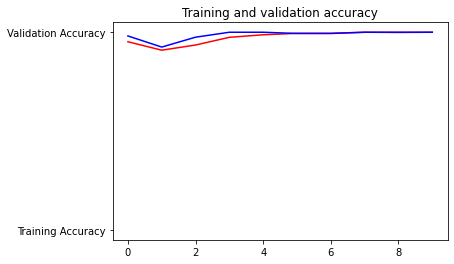

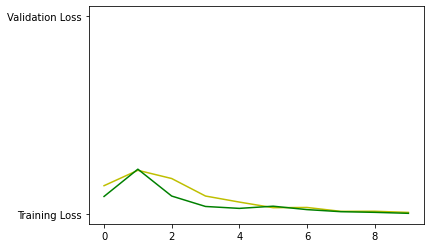

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title("Training and validation accuracy")
plt.figure()

plt.plot(epochs, loss, 'y', "Training Loss")
plt.plot(epochs, val_loss, 'g', "Validation Loss")
plt.figure()

#Loss là hàm mất mát có dạng f(y) = (y* – y)^2.
# y (là giá trị thực tế) và  y* (là kết quả dự đoán của model)

### **Sử dụng mô hình**

Saving 00004.png to 00004.png
1/1 [==============================] - 0s 63ms/step
Gia tri du doan: Label1


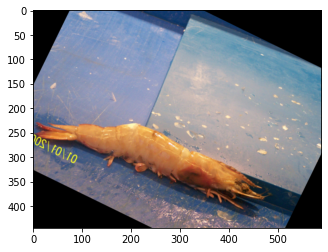

In [ ]:
from google.colab import files
from keras.utils import load_img, img_to_array
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

# for fn in uploaded.keys():
#   #predicting images
#   path='/content/'+fn
#   #In ảnh đọc được
#   plt.imshow(mpimg.imread(path))

#   img=load_img(path,target_size=(100,100))
#   x=img_to_array(img)
#   x=np.expand_dims(x,axis=0)
#   images=np.vstack([x])
#   y_predict = model.predict(images,batch_size=10)
#   print(y_predict)
#   print('Giá trị dự đoán: ', label[np.argmax(y_predict)])

for fn in uploaded.keys():
  path='/content/'+fn
  plt.imshow(mpimg.imread(path))

  img=tf.keras.utils.load_img(path,target_size=(100,100))
  x=tf.keras.utils.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images= np.vstack([x])
  y_predict = model.predict(images, batch_size=5)
  print('Gia tri du doan:', label[np.argmax(y_predict)])

In [ ]:
model.layers

In [ ]:
output_layers=[
    layer.output for layer in model.layers
]

In [ ]:
output_layers

[<KerasTensor: shape=(None, 98, 98, 32) dtype=float32 (created by layer 'conv2d_9')>,
 <KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'max_pooling2d_9')>,
 <KerasTensor: shape=(None, 30, 30, 64) dtype=float32 (created by layer 'conv2d_10')>,
 <KerasTensor: shape=(None, 10, 10, 64) dtype=float32 (created by layer 'max_pooling2d_10')>,
 <KerasTensor: shape=(None, 8, 8, 128) dtype=float32 (created by layer 'conv2d_11')>,
 <KerasTensor: shape=(None, 2, 2, 128) dtype=float32 (created by layer 'max_pooling2d_11')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'flatten_3')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense_6')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'dense_7')>]

Saving 00004.png to 00004 (2).png
(1, 100, 100, 3)
1/1 [==============================] - 0s 80ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


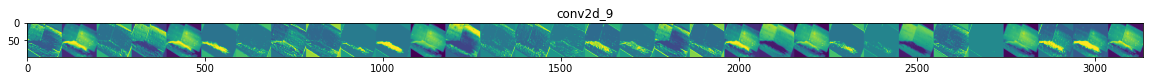

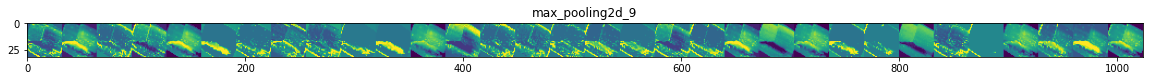

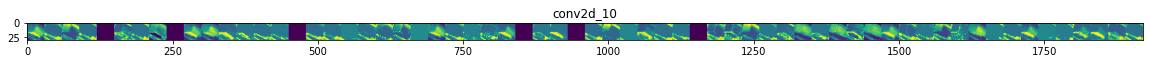

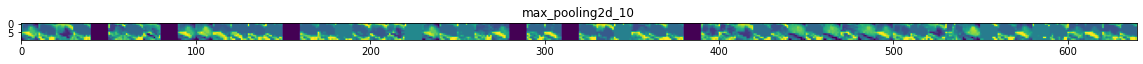

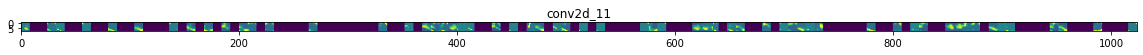

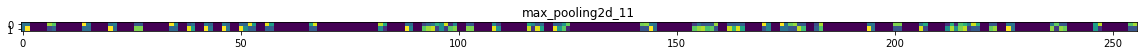

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  path = './' +fn
  img = tf.keras.utils.load_img(path, target_size=(100,100))
  x=tf.keras.utils.img_to_array(img)/255

  x=x.reshape((1,) + x.shape)
  print(x.shape)
  visualization_model= tf.keras.models.Model(inputs = model.input, outputs= output_layers)

  successive_feature_maps= visualization_model.predict(x)
  layer_names= [layer.name for layer in model.layers]

  for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape)==4:
      n_features = feature_map.shape[-1]
      size = feature_map.shape[1]
      display_grid = np.zeros((size, size * n_features))
      for i in range(n_features):
        x= feature_map[0,:,:,-i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x= np.clip(x, 0 , 255).astype('uint8')
        display_grid[:,i*size:(i+1)*size]=x
      scale = 20. / n_features
      plt.figure(figsize=(scale*n_features, scale))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')